In [3]:
from datasets import load_dataset, concatenate_datasets
data = load_dataset("sahil2801/CodeAlpaca-20k")["train"]
print(len(data))

20022


In [8]:
print(len(data["instruction"]))

20022


In [4]:
from FlagEmbedding import FlagModel
model = FlagModel('BAAI/bge-large-en-v1.5', 
                  query_instruction_for_retrieval="",
                  use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

----------using 8*GPUs----------


In [7]:
from tqdm import tqdm
embeddings = model.encode(data["instruction"])

Inference Embeddings:   0%|          | 0/10 [00:00<?, ?it/s]

2024-07-02 19:44:14.765 n213-020-158:61823:70729 [1] NCCL INFO Using non-device net plugin version 0
2024-07-02 19:44:14.765 n213-020-158:61823:70729 [1] NCCL INFO Using network IB
2024-07-02 19:44:14.765 n213-020-158:61823:70730 [2] NCCL INFO Using non-device net plugin version 0
2024-07-02 19:44:14.765 n213-020-158:61823:70731 [3] NCCL INFO Using non-device net plugin version 0
2024-07-02 19:44:14.765 n213-020-158:61823:70728 [0] NCCL INFO Using non-device net plugin version 0
2024-07-02 19:44:14.765 n213-020-158:61823:70731 [3] NCCL INFO Using network IB
2024-07-02 19:44:14.765 n213-020-158:61823:70730 [2] NCCL INFO Using network IB
2024-07-02 19:44:14.766 n213-020-158:61823:70728 [0] NCCL INFO Using network IB
2024-07-02 19:44:14.766 n213-020-158:61823:70733 [5] NCCL INFO Using non-device net plugin version 0
2024-07-02 19:44:14.766 n213-020-158:61823:70732 [4] NCCL INFO Using non-device net plugin version 0
2024-07-02 19:44:14.766 n213-020-158:61823:70732 [4] NCCL INFO Using netwo

Inference Embeddings: 100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


In [10]:
import numpy as np
sampled_indices = np.random.choice(len(embeddings), 1000, replace=False)
sampled_embeddings = embeddings[sampled_indices]

In [11]:
import numpy as np
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform

In [12]:
tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
tsne_results = tsne_model.fit_transform(sampled_embeddings)

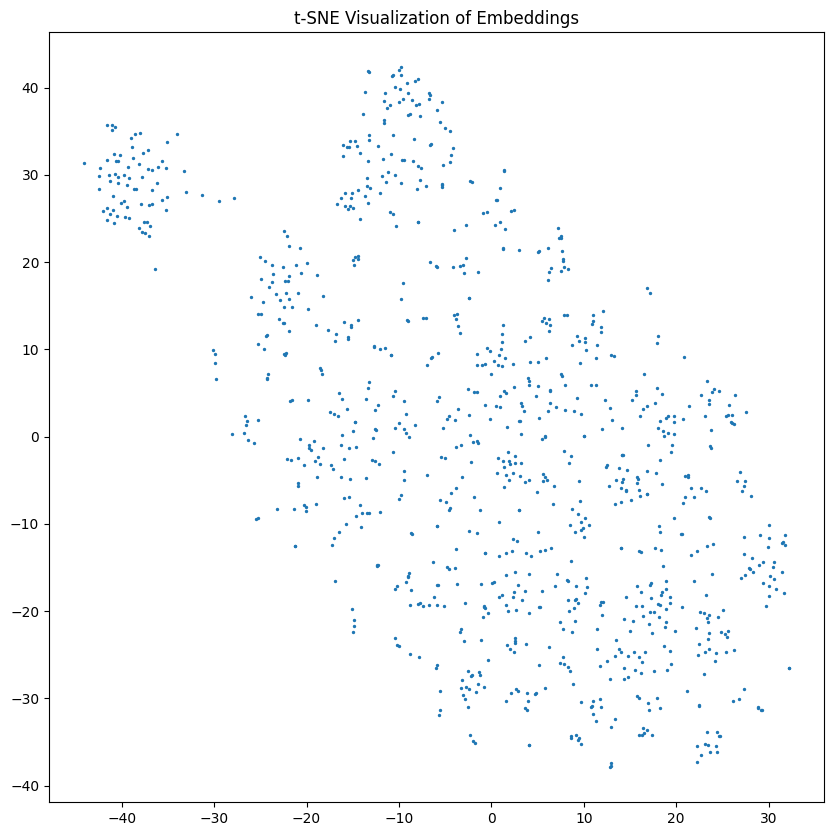

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=2)
plt.title('t-SNE Visualization of Embeddings')
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
# 假设 embeddings 是你的嵌入数据
k = 10
kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)

In [21]:
print(kmeans)

KMeans(n_clusters=10, random_state=0)


In [17]:
predicted_labels = kmeans.labels_

In [ ]:
print(predicted_labels)

In [18]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(embeddings, predicted_labels)
print("Silhouette Coefficient: ", silhouette_avg)

Silhouette Coefficient:  0.036262311902881754


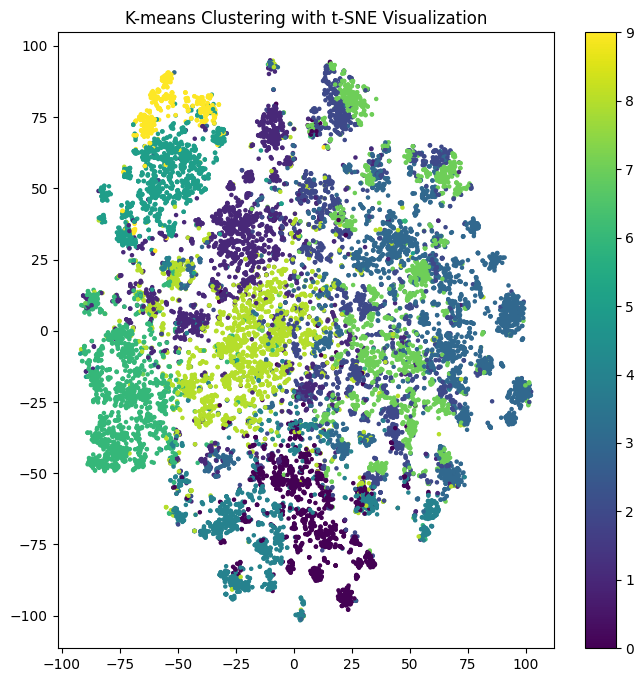

In [23]:
# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(embeddings)

# 可视化
plt.figure(figsize=(8, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=predicted_labels, cmap='viridis', s=5)
plt.title("K-means Clustering with t-SNE Visualization")
plt.colorbar()
plt.show()

In [ ]:
cluster_centers = kmeans.cluster_centers_
print("Cluster centers:\n", cluster_centers)

# Medical

In [24]:
data1 = load_dataset("medalpaca/medical_meadow_medqa")["train"]
print(len(data1["input"]))

Generating train split:   0%|          | 0/10178 [00:00<?, ? examples/s]

10178


In [25]:
from datasets import concatenate_datasets
data_concated = concatenate_datasets([data,data1])

In [26]:
def concat_columns(example):
    # 将 instruction 和 input 列的值拼接起来，用空格分隔
    example['text'] = example['instruction'] + ' ' + example['input']
    return example

# 使用 map 方法来应用这个函数到数据集中的每一行
data_concated = data_concated.map(concat_columns)
print(len(data_concated["text"]))

Map:   0%|          | 0/30200 [00:00<?, ? examples/s]

30200


Inference Embeddings: 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]


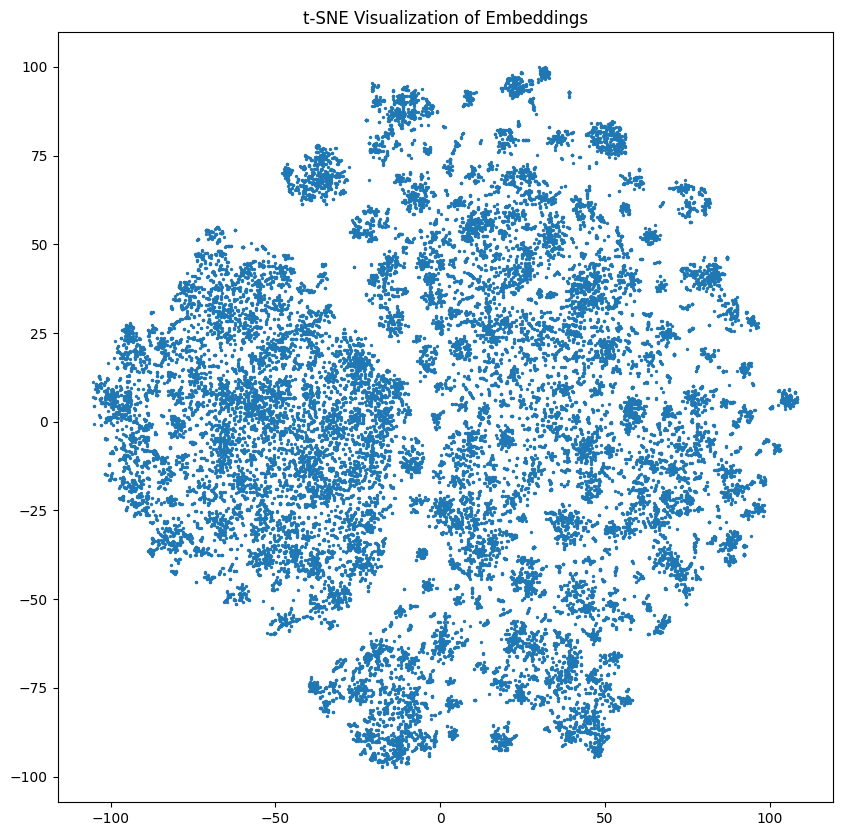

In [28]:
from tqdm import tqdm
embeddings = model.encode(data_concated["text"])
import numpy as np
# sampled_indices = np.random.choice(len(embeddings), 1000, replace=False)
# sampled_embeddings = embeddings[sampled_indices]
import numpy as np
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
tsne_results = tsne_model.fit_transform(embeddings)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=2)
plt.title('t-SNE Visualization of Embeddings')
plt.show()